In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [4]:
crash = pd.read_csv('/content/drive/MyDrive/Colab Data/accident.csv', encoding = "ISO-8859-1")
crash

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,13,22,10:00pm-10:59pm,25,25,23,11:00pm-11:59pm,2,2,2
1,1,Alabama,10002,0,0,1,1,0,2,2,...,Unknown,19,7:00pm-7:59pm,9,9,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
2,1,Alabama,10003,1,1,1,1,0,1,1,...,29,9,9:00am-9:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,20,16,4:00pm-4:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,2,2,0,4,4,...,20,22,10:00pm-10:59pm,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,56,Wyoming,560100,0,0,1,1,0,2,2,...,2,9,9:00am-9:59am,16,16,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
39504,56,Wyoming,560101,0,0,2,2,0,2,2,...,7,19,7:00pm-7:59pm,3,3,19,7:00pm-7:59pm,28,28,1
39505,56,Wyoming,560102,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
39506,56,Wyoming,560103,1,1,1,1,0,1,1,...,11,17,5:00pm-5:59pm,17,17,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [5]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         39508 non-null  int64  
 1   STATENAME     39508 non-null  object 
 2   ST_CASE       39508 non-null  int64  
 3   PEDS          39508 non-null  int64  
 4   PERNOTMVIT    39508 non-null  int64  
 5   VE_TOTAL      39508 non-null  int64  
 6   VE_FORMS      39508 non-null  int64  
 7   PVH_INVL      39508 non-null  int64  
 8   PERSONS       39508 non-null  int64  
 9   PERMVIT       39508 non-null  int64  
 10  COUNTY        39508 non-null  int64  
 11  COUNTYNAME    39508 non-null  object 
 12  CITY          39508 non-null  int64  
 13  CITYNAME      39508 non-null  object 
 14  MONTH         39508 non-null  int64  
 15  MONTHNAME     39508 non-null  object 
 16  DAY           39508 non-null  int64  
 17  DAYNAME       39508 non-null  int64  
 18  DAY_WEEK      39508 non-nu

In [6]:
crash.isnull().sum().sort_values(ascending = False)

TWAY_ID2        29859
STATE               0
LATITUDE            0
WRK_ZONENAME        0
WRK_ZONE            0
                ...  
TWAY_ID             0
MINUTENAME          0
MINUTE              0
HOURNAME            0
FATALS              0
Length: 80, dtype: int64

In [7]:
### Data Description
# PEDS: Number of Persons Not in Motor Vehicles
# PERNOTMVIT: Number of Persons Not in Motor Vehicles In-Transport
# VE_TOTAL: Number of Vehicles in Crash
# VE_FORMS: Number of Vehicle Forms
# PVH_INVL: Number of Parked/Working Vehicles in the Crash
# PERSONS: Number of Person Forms
# PERMVIT: Number of Persons in Motor Vehicles In-Transport
# COUNTY: ID of the County(Special Number)(0 = Not applicable, 997 = Other, 998 = Not reported, 999 = Unknown)
# COUNTYNAME: Name of the County
# CITY: ID of the City(0 = Not applicable, 9997 = Other, 9898 = Not reported, 9999 = Unknown)
# CITYNAME: Name of the City
# MONTH: Month name by Number
# MONTHNAME: Month name
# DAY: Day of the Month of the Crash(1-31 Days of Month, 99 = Unknown)
# DAYNAME: Same column as DAY
# DAY_WEEK: Day of the Week(in Number)
# DAY_WEEKNAME: Name of the Day(Monday, Tuesday, etc)
# HOUR: When the Crash Happened
# HOURNAME: Timestamp of the Crash
# MINUTE: When the Crash Happened after hour whihc records minutes(00-59 Minutes, 99= Not Applicable, 99 = Unknown)
# MINUTENAME: Same Column as MINUTE
# TWAY_ID: Trifficway on which crash happened
# ROUTE: Trafficway on which crash happened
# ROUTNAME: Name of the Trafficway like
#(Interstate, U.S. Highway, State Highway,County Road,Local Street – Township,Local Street – Municipality,Local Street – Frontage Road (Since 1994),Other,Unknown)
# RUR_URB: Rural or Urban(1 = Rural, 2 = Urban)
# RUR_URBNAME: Name of the Rural or Urban
# FUNC_SYS: ID of Functional Classification of the segment of the trafficway which crash occured
# FUNC_SYSNAME: Name of the Functional Classification
# RD_OWNER: ID of Legal Ownership of Segment of Trafficway(Agency ID)
# RD_OWNERNAME: Name of the Legal Ownership(Agency Name)
# NHS: National Highway System(0 = Not National Highway, 1 = National Highway, 9 = Unknown)
# NHSNAME: Name of the National Highway
# SP_JUR: Special Jurisdiction(from 1-9)
# SP_JURNAME: Name of the Special Jurisdiction
# MILEPT: Mile Point of nearset to the location where crash occured
# MILEPTNAME: Name of the Mile Point(0 is Defined by None in the column else same)
# LATITUDE: Latitude
# LATITUDENAME: Same as LATITUDE
# LONGIUDE: Longitude
# LONGIUDENAME: Same as LONGITD
# HARM_EV: First injury or damage producing event of crash by ID
# HARM_EVNAME: Name of the First injury or damage producing event
# MAN_COLL: Type of Collision by ID
# MAN_COLLNAME: Name of the Type of Collision
# RELJCT1: Relation to Junction(Internchangable area)
# RELJCT1NAME: Name of the Relation to Junction
# RELJCT2: Relation to Junction (Specific Location)
# RELJCT2NAME: Name of the Relation to Junction
# TYP_INT: Type of Intersection by ID
# TYP_INTNAME: Name of the Type of Intersection
# REL_ROAD: ID of Relation to Trafficway(location of crash as it relates to its position within or outside the trafficway based on the 'First Harmful Event')
# REL_ROADNAME: Name of the Relation to Trafficway
# WRK_ZONE: ID of Work Zone
# WRK_ZONENAME: Name of the Work Zone
# LGT_COND: ID of Lighting Condition
# LGT_CONDNAME: Name of the Lighting Condition\
# WEATHER: ID of Weather
# WEATHERNAME: Name of the Weather
# SCH_BUS: ID of whether school bus is related to crash or not
# SCH_BUSNAME: (YES/NO)
# RAIL: Rail Grade Crossing Identifier(Six Digits Followed by One Alphabetic Valid F.R.A. Code, 00000 = Not Applicable, 99999 = Unknown)
# RAILNAME: Name of the Rail Grade
# NOT_HOUR: Hour that emergency medical services was notified.
# NOT_HOURNAME: Timestamp of the Emergency Medical Services notified.
# NOT_MIN: Minutes after the hour that emergency medical services was notified.
# NOT_MINNAME: Same Column as NOT_MIN(Just 0 is Unknown here)
# ARR_HOUR: Hour that emergency medical services arrived
# 0-23 Hours, 88 = Not Applicable or Not Notified, 99 = Unknown Hour, Officially Cancelled, Unkown if Arrived)
# ARR_HOURNAME: Timestamp of the Emergency Medical Services arrived
# ARR_MIN: Minutes after the hour that emergency medical services arrived
# 0-59 Minutes, 88 = Not Applicable or Not Notified, 99 = Unknown Minute, Officially Cancelled, Unkown if Arrived)
# ARR_MINNAME: Same Column as ARR_MIN(Just String Vl)
# HOSP_HR: Hour that emergency medical services arrived at the hospital
# 0-23 Hours, 88 = Not Applicable or Not Notified, 99 = Unknown Hour, Officially Cancelled, Unkown if Arrived)
# HOSP_HRNAME: Timestamp of the Emergency Medical Services arrived at the hospital
# HOSP_MN: Minutes after the hour that emergency medical services arrived at the hospital
# 0-59 Minutes, 88 = Not Applicable or Not Notified, 99 = Unknown Minute, Officially Cancelled, Unkown if Arrived)
# FATALS: Number of Fatalities

Now to make the dataset tidy I'll rename the columns to be more readable and understandable. And remove most of the unnecessary columns which are not needed for further analysis.

In [8]:
crash.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAYNAME', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'TWAY_ID', 'TWAY_ID2', 'ROUTE', 'ROUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'NHS',
       'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE',
       'LATITUDENAME', 'LONGITUDE', 'LONGITUDNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME',
       'ARR_

Here by deleting the columns which are not needed for further analysis
`STATE`,`ST_CASE`, `VE_FORMS`, `PERSONS`, `COUNTY`, `CITY`,, `DAYNAME`,`HOURNAME`,`MINUTENAME`,`TWAY_ID2`(It has empty values around 30 Thousand),`ROUTE` , `RUR_URB`, `FUNC_SYS`, `RD_OWNER`, `NHS`, `SP_JUR`,`MILEPTNAME`, `LATTITUDENAME`, `LONGITUDENAME`, `HARM_EV`, `MAN_COLL`, `RELJCT1`,`RELJCT2`,`TYP_INT`, `REL_ROAD`, `WRK_ZONE`, `LGT_COND`, `WEATHER`, `SCH_BUS`, `RAIL`, `NOT_HOURNAME`, `NOT_MINNAME`, `ARR_HOURNAME`, `ARR_MINNAME`, `HOSP_HRNAME`, `HOSP_MNNAME`

In [9]:
columns_to_drop = ['STATE', 'ST_CASE', 'VE_FORMS', 'PERSONS', 'COUNTY', 'CITY', 'DAYNAME', 'HOURNAME', 'MINUTENAME', 'TWAY_ID2', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'NHS', 'SP_JUR', 'MILEPTNAME', 'LATITUDENAME', 'LONGITUDNAME', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'REL_ROAD', 'WRK_ZONE', 'LGT_COND', 'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOURNAME', 'NOT_MINNAME', 'ARR_HOURNAME', 'ARR_MINNAME', 'HOSP_HRNAME', 'HOSP_MNNAME']

crash = crash.drop(columns=columns_to_drop)

In [10]:
crash

,STATENAME,PEDS,PERNOTMVIT,VE_TOTAL,PVH_INVL,PERMVIT,COUNTYNAME,CITYNAME,MONTH,MONTHNAME,...,WEATHERNAME,SCH_BUSNAME,RAILNAME,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS
0,Alabama,0,0,2,0,3,ST. CLAIR (115),NOT APPLICABLE,2,February,...,Rain,No,Not Applicable,22,13,22,25,23,2,2
1,Alabama,0,0,1,0,2,JEFFERSON (73),NOT APPLICABLE,2,February,...,Rain,No,Not Applicable,99,99,19,9,88,88,2
2,Alabama,1,1,1,0,1,JEFFERSON (73),NOT APPLICABLE,2,February,...,Rain,No,Not Applicable,9,29,9,40,88,88,1
3,Alabama,0,0,1,0,1,SHELBY (117),NOT APPLICABLE,2,February,...,Clear,No,Not Applicable,16,20,16,28,99,99,1
4,Alabama,0,0,2,0,4,JEFFERSON (73),NOT APPLICABLE,1,January,...,Cloudy,No,Not Applicable,22,20,22,30,88,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,Wyoming,0,0,1,0,2,JOHNSON (19),NOT APPLICABLE,11,November,...,Clear,No,Not Applicable,9,2,9,16,88,88,1
39504,Wyoming,0,0,2,0,2,BIG HORN (3),NOT APPLICABLE,12,December,...,Clear,No,Not Applicable,18,7,19,3,19,28,1
39505,Wyoming,0,0,1,0,1,SWEETWATER (37),NOT APPLICABLE,12,December,...,Clear,No,Not Applicable,99,99,99,99,88,88,1
39506,Wyoming,1,1,1,0,1,LARAMIE (21),CHEYENNE,12,December,...,Clear,No,Not Applicable,17,11,17,17,88,88,1


In [11]:
crash.columns

Index(['STATENAME', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'PVH_INVL', 'PERMVIT',
       'COUNTYNAME', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'MINUTE', 'TWAY_ID', 'ROUTENAME',
       'RUR_URBNAME', 'FUNC_SYSNAME', 'RD_OWNERNAME', 'NHSNAME', 'SP_JURNAME',
       'MILEPT', 'LATITUDE', 'LONGITUDE', 'HARM_EVNAME', 'MAN_COLLNAME',
       'RELJCT1NAME', 'RELJCT2NAME', 'TYP_INTNAME', 'REL_ROADNAME',
       'WRK_ZONENAME', 'LGT_CONDNAME', 'WEATHERNAME', 'SCH_BUSNAME',
       'RAILNAME', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR',
       'HOSP_MN', 'FATALS'],
      dtype='object')

In [12]:
column_rename = {
    'STATENAME': 'state_name',
    'PEDS': 'pedestrians_involved',
    'PERNOTMVIT': 'persons_not_in_vehicles',
    'VE_TOTAL': 'total_vehicles_involved',
    'PVH_INVL': 'park_working_vc_crash',
    'PERMVIT': 'no_of_persons_transport_cv',
    'COUNTYNAME': 'county_name',
    'CITYNAME': 'city_name',
    'MONTH': 'month',
    'MONTHNAME': 'month_name',
    'DAY': 'day_of_month',
    'DAY_WEEK': 'day_of_week',
    'DAY_WEEKNAME': 'day',
    'YEAR': 'year',
    'HOUR': 'hour_crash',
    'MINUTE': 'minute_crash',
    'TWAY_ID': 'trafficway_id',
    'ROUTENAME': 'route',
    'RUR_URBNAME': 'rural_urban',
    'FUNC_SYSNAME': 'func_class_trafficway_crash',
    'RD_OWNERNAME': 'ownership_of_road',
    'NHSNAME': 'national_highway',
    'SP_JURNAME': 'jurisdiction_name',
    'MILEPT': 'mile_point',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'HARM_EVNAME': 'first_injury_or_damage',
    'MAN_COLLNAME': 'type_of_collision',
    'RELJCT1NAME': 'relation_to_junction',
    'RELJCT2NAME': 'specific_relation_to_junction',
    'TYP_INTNAME': 'type_of_intersection',
    'REL_ROADNAME': 'relation_to_trafficway',
    'WRK_ZONENAME': 'work_zone',
    'LGT_CONDNAME': 'lighting_condition',
    'WEATHERNAME': 'weather',
    'SCH_BUSNAME': 'school_bus',
    'RAILNAME': 'rail_grade',
    'NOT_HOUR': 'notification_hour',
    'NOT_MIN': 'notification_minute',
    'ARR_HOUR': 'arrived_hour',
    'ARR_MIN': 'arrived_minute',
    'HOSP_HR': 'hospital_hour',
    'HOSP_MN': 'hospital_minute',
    'FATALS': 'fatalities'
}

crash.rename(columns=column_rename, inplace=True)

In [84]:
crash

,state_name,pedestrians_involved,persons_not_in_vehicles,total_vehicles_involved,park_working_vc_crash,no_of_persons_transport_cv,county_name,city_name,month,month_name,...,weather,school_bus,rail_grade,notification_hour,notification_minute,arrived_hour,arrived_minute,hospital_hour,hospital_minute,fatalities
0,Alabama,0,0,2,0,3,ST. CLAIR (115),NOT APPLICABLE,2,February,...,Rain,No,Not Applicable,22,13,22,25,23,2,2
1,Alabama,0,0,1,0,2,JEFFERSON (73),NOT APPLICABLE,2,February,...,Rain,No,Not Applicable,99,99,19,9,88,88,2
2,Alabama,1,1,1,0,1,JEFFERSON (73),NOT APPLICABLE,2,February,...,Rain,No,Not Applicable,9,29,9,40,88,88,1
3,Alabama,0,0,1,0,1,SHELBY (117),NOT APPLICABLE,2,February,...,Clear,No,Not Applicable,16,20,16,28,99,99,1
4,Alabama,0,0,2,0,4,JEFFERSON (73),NOT APPLICABLE,1,January,...,Cloudy,No,Not Applicable,22,20,22,30,88,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,Wyoming,0,0,1,0,2,JOHNSON (19),NOT APPLICABLE,11,November,...,Clear,No,Not Applicable,9,2,9,16,88,88,1
39504,Wyoming,0,0,2,0,2,BIG HORN (3),NOT APPLICABLE,12,December,...,Clear,No,Not Applicable,18,7,19,3,19,28,1
39505,Wyoming,0,0,1,0,1,SWEETWATER (37),NOT APPLICABLE,12,December,...,Clear,No,Not Applicable,99,99,99,99,88,88,1
39506,Wyoming,1,1,1,0,1,LARAMIE (21),CHEYENNE,12,December,...,Clear,No,Not Applicable,17,11,17,17,88,88,1


In [14]:
crash.dtypes

state_name                        object
pedestrians_involved               int64
persons_not_in_vehicles            int64
total_vehicles_involved            int64
park_working_vc_crash              int64
no_of_persons_transport_cv         int64
county_name                       object
city_name                         object
month                              int64
month_name                        object
day_of_month                       int64
day_of_week                        int64
day                               object
year                               int64
hour_crash                         int64
minute_crash                       int64
trafficway_id                     object
route                             object
rural_urban                       object
func_class_trafficway_crash       object
ownership_of_road                 object
national_highway                  object
jurisdiction_name                 object
mile_point                         int64
latitude        

In [15]:
month_fatals = crash.groupby('month_name')['fatalities'].sum()
sorted_month_fatals = month_fatals.sort_values(ascending=False)
sorted_month_fatals

month_name
October      4101
August       4013
July         3879
September    3861
June         3789
May          3768
November     3599
April        3557
December     3498
March        3214
January      3099
February     2561
Name: fatalities, dtype: int64

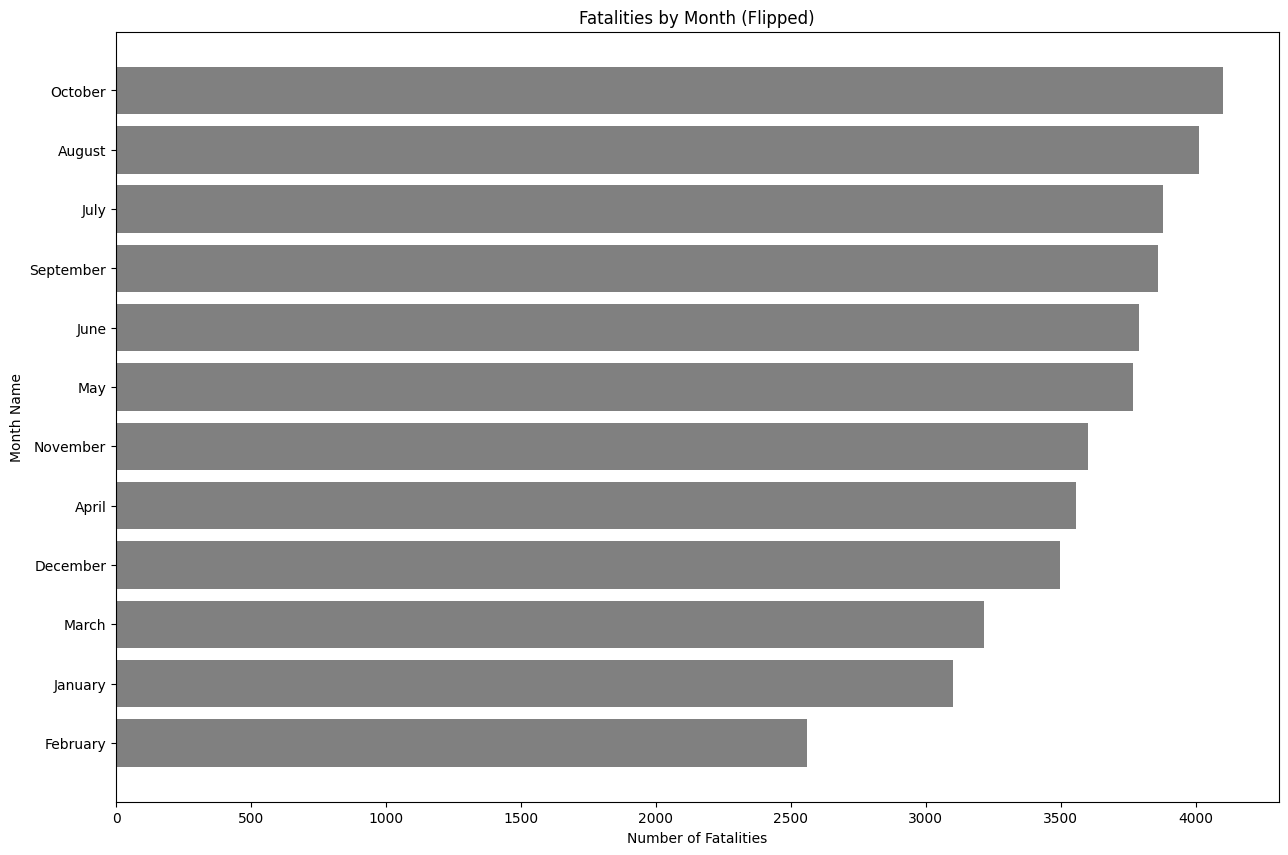

In [16]:
# Why this visualization?
# To Check the number of Fatalities by Month in descending order for data description analysis.
reversed_index = sorted_month_fatals.index[::-1]
reversed_values = sorted_month_fatals.values[::-1]

plt.figure(figsize=(15, 10))
plt.barh(reversed_index, reversed_values, color='gray')
plt.xlabel('Number of Fatalities')
plt.ylabel('Month Name')
plt.title('Fatalities by Month (Flipped)')
plt.show()

In [79]:
vehicle_state = crash.groupby('state_name')['total_vehicles_involved'].sum()
vehicle_state.sort_values(ascending=False)

state_name
Texas                   6686
California              6386
Florida                 5603
Georgia                 2673
North Carolina          2419
Tennessee               2015
Ohio                    2007
Illinois                1991
Pennsylvania            1831
South Carolina          1772
Arizona                 1728
New York                1715
Michigan                1689
Missouri                1462
Louisiana               1422
Indiana                 1419
Virginia                1402
Alabama                 1401
Kentucky                1195
Oklahoma                1098
Mississippi             1058
Colorado                1048
New Jersey              1036
Washington               972
Arkansas                 968
Wisconsin                901
Oregon                   850
Maryland                 836
Minnesota                688
New Mexico               658
Massachusetts            626
Kansas                   615
Nevada                   582
Iowa                     499
Uta

In [18]:
count_of_accidents = crash.groupby('state_name')['state_name'].count()
count_of_accidents.sort_values(ascending=False)

state_name
Texas                   4068
California              3983
Florida                 3451
Georgia                 1670
North Carolina          1535
Ohio                    1242
Tennessee               1229
Illinois                1210
Pennsylvania            1153
South Carolina          1112
New York                1099
Michigan                1072
Arizona                 1063
Missouri                 931
Virginia                 906
Louisiana                887
Alabama                  885
Indiana                  863
Kentucky                 734
Mississippi              697
Oklahoma                 681
New Jersey               669
Colorado                 638
Arkansas                 631
Washington               603
Wisconsin                572
Oregon                   552
Maryland                 522
Minnesota                451
New Mexico               427
Massachusetts            397
Kansas                   381
Nevada                   360
Iowa                     329
Uta

In [19]:
df = pd.concat([count_of_accidents, vehicle_state], axis=1)
df.columns = ['count_of_accidents', 'total_vehicles_involved']
df

,count_of_accidents,total_vehicles_involved
state_name,,
Alabama,885,1401
Alaska,59,94
Arizona,1063,1728
Arkansas,631,968
California,3983,6386
Colorado,638,1048
Connecticut,283,450
Delaware,132,209
District of Columbia,40,67


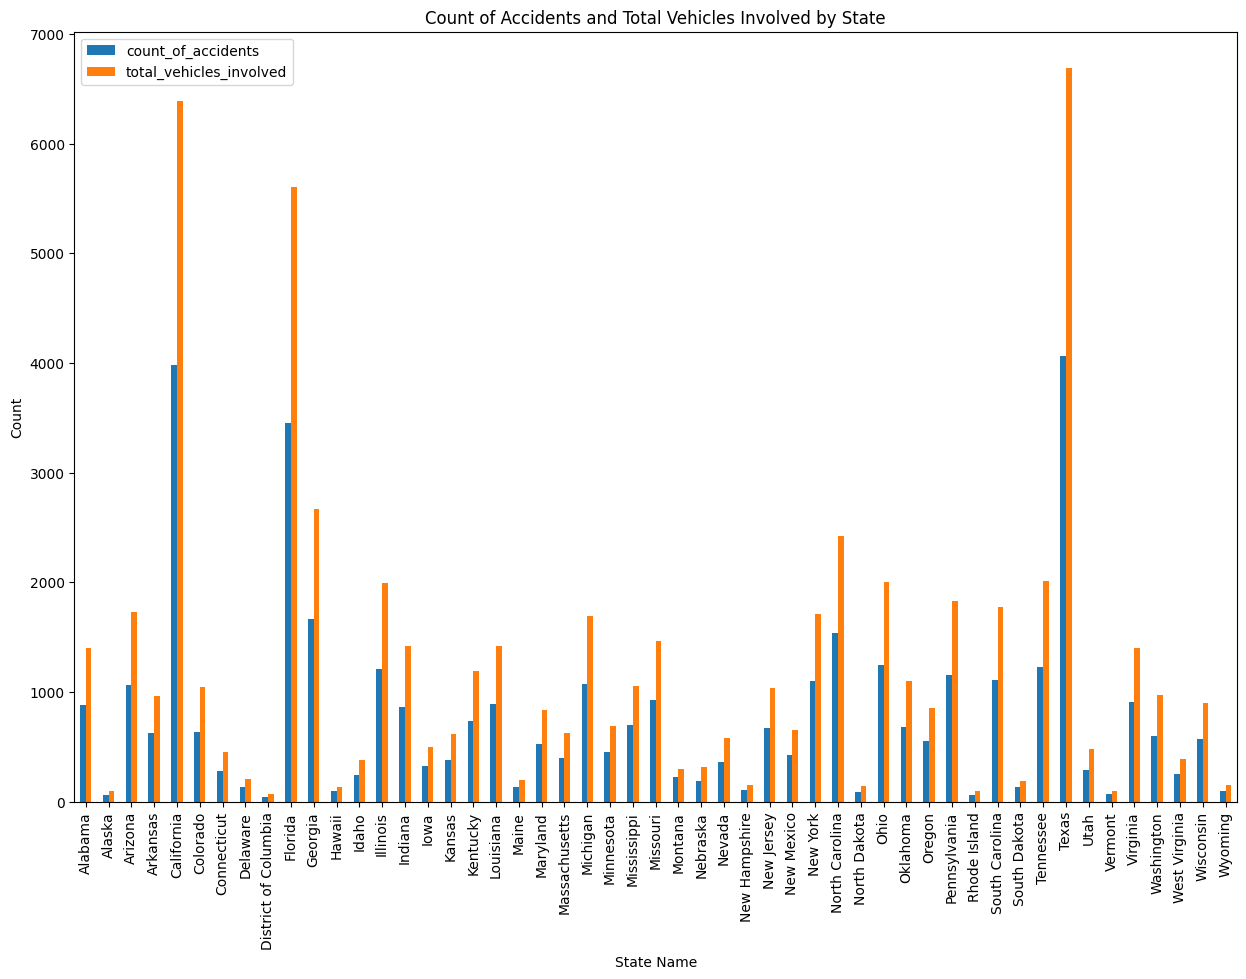

In [ ]:
# Why this visualization?
# This visualization is to show the relationship between the number of accidents and the total number of vehicles involved in the crashes which is important for data description.
df.plot(kind='bar', figsize=(15, 10))
plt.title('Count of Accidents and Total Vehicles Involved by State')
plt.xlabel('State Name')
plt.ylabel('Count')
plt.legend()
plt.show()

In [20]:
collision_type = crash.groupby('type_of_collision')['type_of_collision'].count()
collision_type.sort_values(ascending=False)

type_of_collision
The First Harmful Event was Not a Collision with a Motor Vehicle in Transport    23647
Angle                                                                             7183
Front-to-Front                                                                    4295
Front-to-Rear                                                                     2949
Sideswipe - Same Direction                                                         730
Sideswipe - Opposite Direction                                                     454
Other                                                                              102
Not Reported                                                                        60
Reported as Unknown                                                                 47
Rear-to-Side                                                                        40
Rear-to-Rear                                                                         1
Name: type_of_collision, 

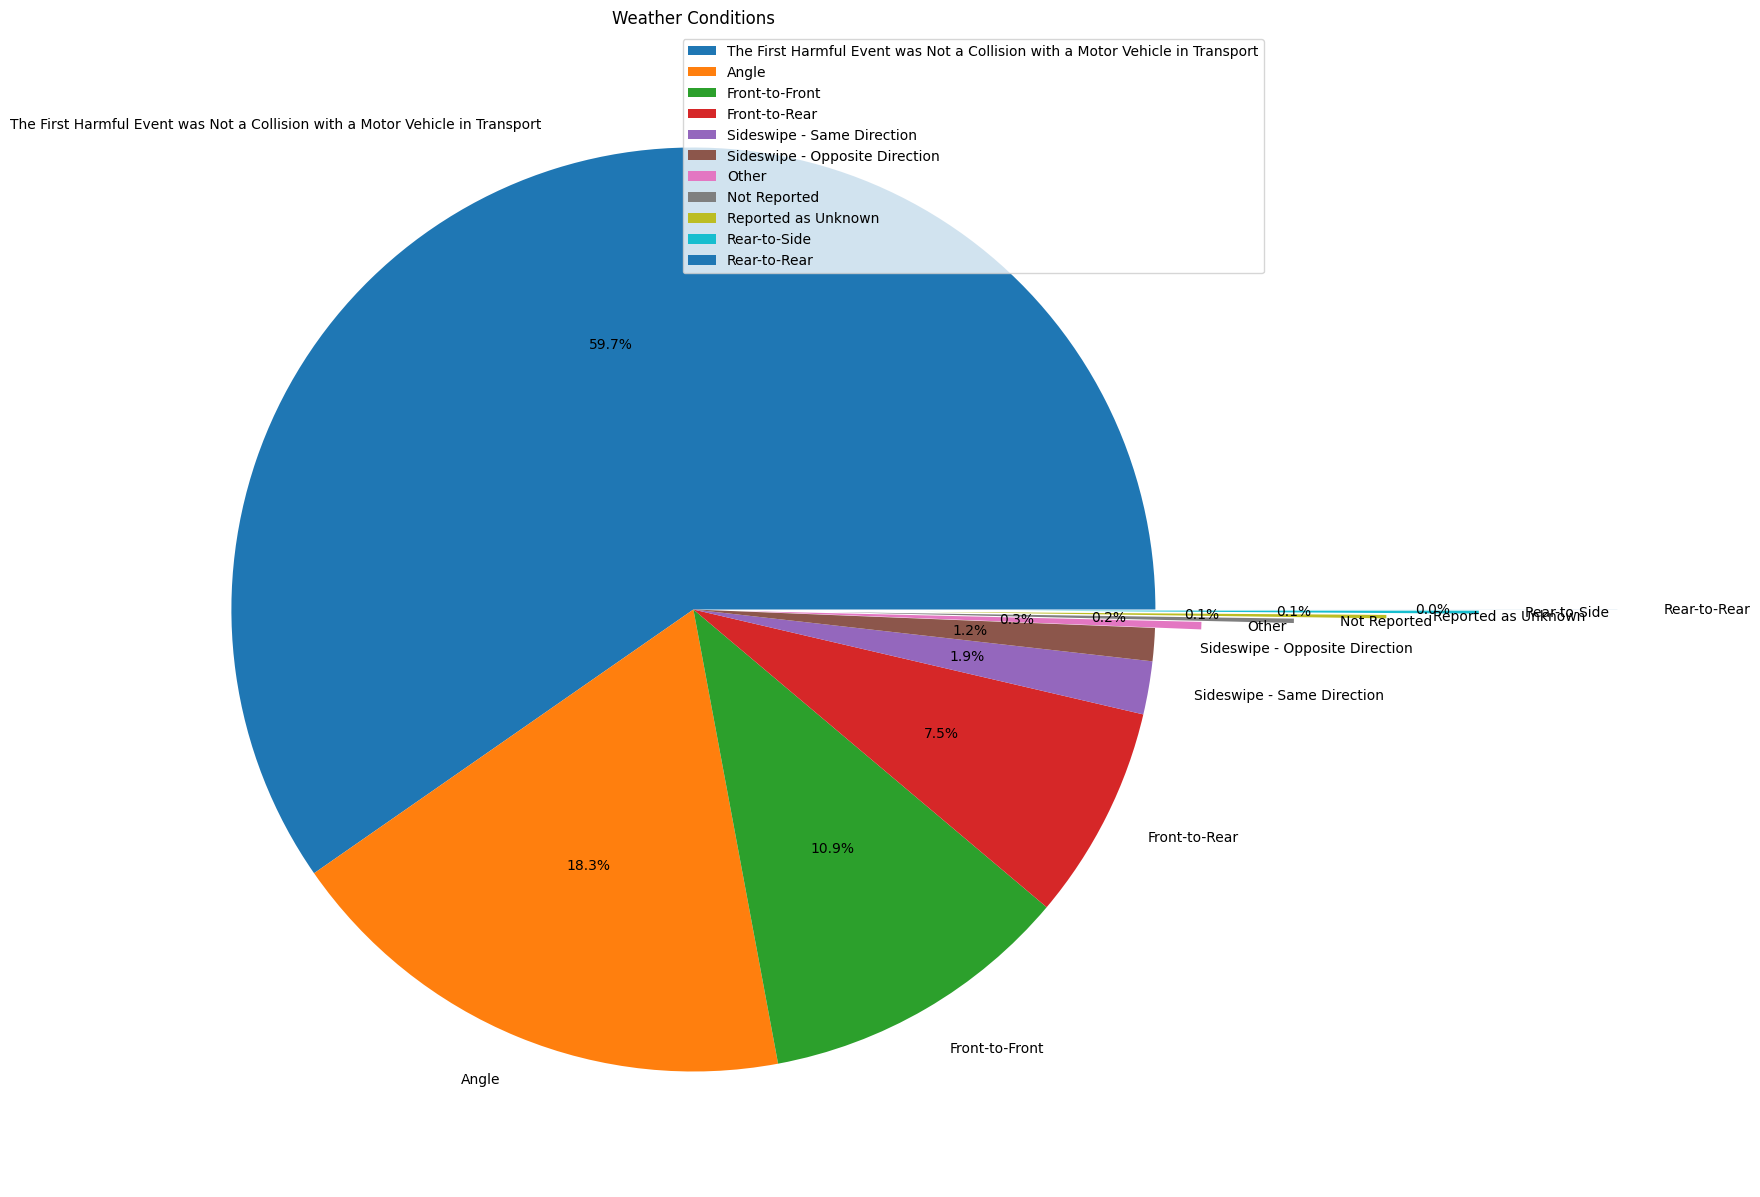

In [53]:
# Why this visualization?
# This visualization shows the distrubition of type of collsions.
data = [23467, 7183, 4295, 2949, 730, 454, 102, 60, 47, 40, 1]
labels = ["The First Harmful Event was Not a Collision with a Motor Vehicle in Transport", "Angle", "Front-to-Front", "Front-to-Rear", "Sideswipe - Same Direction", "Sideswipe - Opposite Direction", "Other", "Not Reported ", "Reported as Unknown", "Rear-to-Side", "Rear-to-Rear"]

myexplode = [0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.5, 0.7, 1]

plt.figure(figsize=(15, 15))
plt.pie(data, labels=labels, autopct="%1.1f%%", explode=myexplode)
plt.title("Weather Conditions")
plt.legend(labels, loc="best")
plt.show()

In [64]:
weather = crash.groupby('weather')['weather'].count()
weather

weather
Blowing Sand, Soil, Dirt       15
Blowing Snow                   28
Clear                       28726
Cloudy                       5379
Fog, Smog, Smoke              468
Freezing Rain or Drizzle       29
Not Reported                 1624
Other                          46
Rain                         2609
Reported as Unknown           178
Severe Crosswinds              68
Sleet or Hail                  33
Snow                          305
Name: weather, dtype: int64

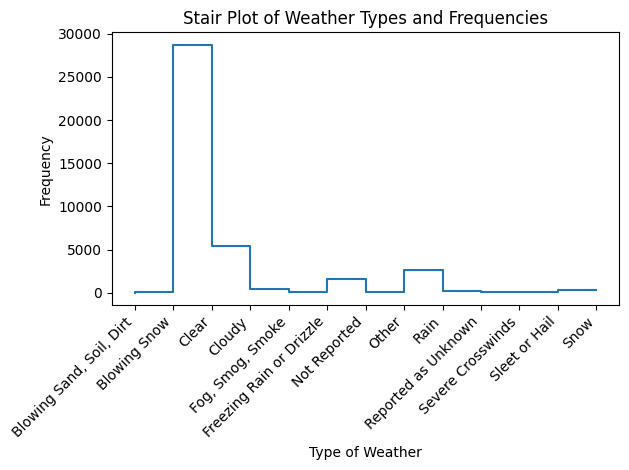

In [130]:
# Why this visualization?
# This visualization provides the information on the number of crashes (count) based on each weather condition.
weather_types = ['Blowing Sand, Soil, Dirt','Blowing Snow','Clear', 'Cloudy','Fog, Smog, Smoke','Freezing Rain or Drizzle', 'Not Reported', 'Other','Rain', 'Reported as Unknown',
                 'Severe Crosswinds', 'Sleet or Hail','Snow'
                 ]

frequency = [15,28,28726,5379,468,29,1624,46,2609,178,68,33,305]

plt.step(weather_types, frequency, where='pre')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Type of Weather')
plt.ylabel('Frequency')
plt.title('Stair Plot of Weather Types and Frequencies')
plt.tight_layout()
plt.show()

Key Insights: General Assumption is that During Extensive Weather conditions there is an increase in the number of crashes. But in the above stairstep graph we can see in clear weather there are most number of crashes. Followed by Cloudy and Rain.

In [99]:
# Why am I doing this?
# To make time series analysis on crashes
date_columns = ['year', 'month', 'day_of_month', 'hour_crash', 'minute_crash']

crash.replace({'hour_crash': '99', 'minute_crash': '99'}, np.nan, inplace=True)
crash['hour_crash'].fillna('00', inplace=True)
crash['minute_crash'].fillna('00', inplace=True)

crash[date_columns] = crash[date_columns].astype(str)

crash['month'] = crash['month'].str.zfill(2)
crash['day_of_month'] = crash['day_of_month'].str.zfill(2)
crash['hour_crash'] = crash['hour_crash'].str.zfill(2)
crash['minute_crash'] = crash['minute_crash'].str.zfill(2)


crash['datetime'] = pd.to_datetime(crash[date_columns].agg('-'.join, axis=1), errors = 'coerce', format='%Y-%m-%d-%H-%M')

# Set the datetime column as the index
crash.set_index('datetime', inplace=True)

crash

,state_name,pedestrians_involved,persons_not_in_vehicles,total_vehicles_involved,park_working_vc_crash,no_of_persons_transport_cv,county_name,city_name,month,month_name,...,weather,school_bus,rail_grade,notification_hour,notification_minute,arrived_hour,arrived_minute,hospital_hour,hospital_minute,fatalities
datetime,,,,,,,,,,,,,,,,,,,,,
2021-02-12 22:10:00,Alabama,0,0,2,0,3,ST. CLAIR (115),NOT APPLICABLE,02,February,...,Rain,No,Not Applicable,22,13,22,25,23,2,2
2021-02-11 18:00:00,Alabama,0,0,1,0,2,JEFFERSON (73),NOT APPLICABLE,02,February,...,Rain,No,Not Applicable,99,99,19,9,88,88,2
2021-02-07 00:20:00,Alabama,1,1,1,0,1,JEFFERSON (73),NOT APPLICABLE,02,February,...,Rain,No,Not Applicable,9,29,9,40,88,88,1
2021-02-03 16:20:00,Alabama,0,0,1,0,1,SHELBY (117),NOT APPLICABLE,02,February,...,Clear,No,Not Applicable,16,20,16,28,99,99,1
2021-01-30 22:20:00,Alabama,0,0,2,0,4,JEFFERSON (73),NOT APPLICABLE,01,January,...,Cloudy,No,Not Applicable,22,20,22,30,88,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27 09:02:00,Wyoming,0,0,1,0,2,JOHNSON (19),NOT APPLICABLE,11,November,...,Clear,No,Not Applicable,9,2,9,16,88,88,1
2021-12-14 18:00:00,Wyoming,0,0,2,0,2,BIG HORN (3),NOT APPLICABLE,12,December,...,Clear,No,Not Applicable,18,7,19,3,19,28,1
2021-12-15 10:34:00,Wyoming,0,0,1,0,1,SWEETWATER (37),NOT APPLICABLE,12,December,...,Clear,No,Not Applicable,99,99,99,99,88,88,1


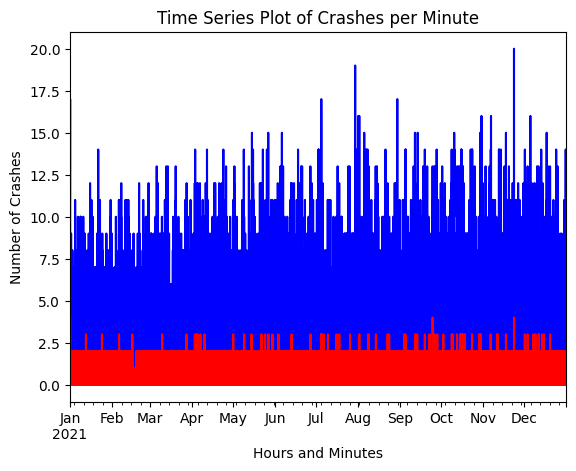

In [127]:
# Why this visualization?
# To analyze the number crashes based on hours and mintues

#Resampling using hourly frequency
crashes_per_hour = crash.resample('H').size()
crashes_per_hour.plot(color='blue')
#Resampling using minute frequency
crashes_per_minute = crash.resample('T').size()
crashes_per_minute.plot(color='red')

plt.xlabel('Hours and Minutes')
plt.ylabel('Number of Crashes')
plt.title('Time Series Plot of Crashes per Minute and per Hour')
plt.show()

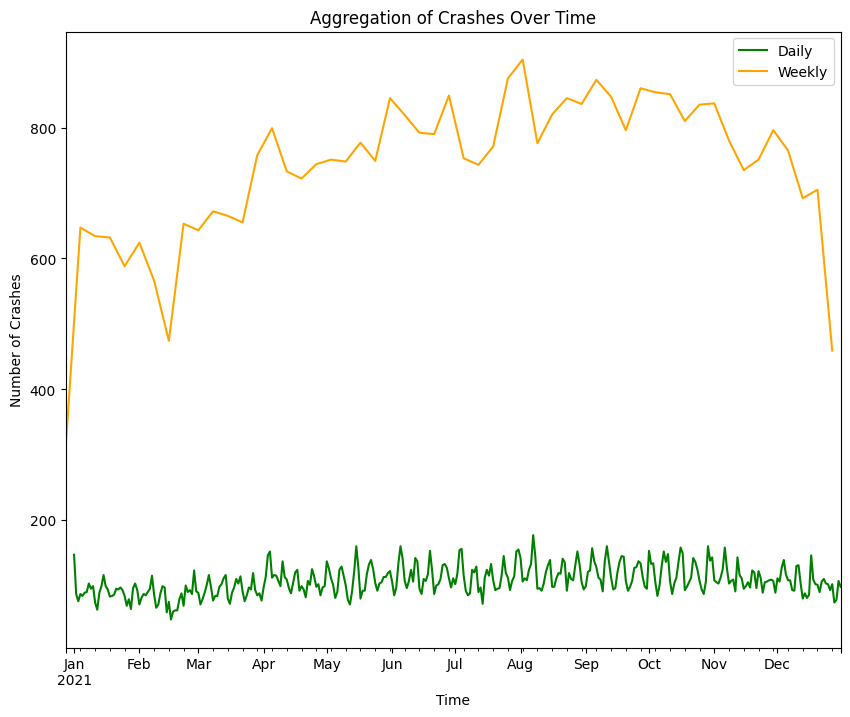

In [129]:
# Why this visualization?
# To undestand the pattern in crash frequency over time, bith at daily and weekly level
crashes_per_day = crash.resample('D').size()
crashes_per_week = crash.resample('W').size()


plt.figure(figsize=(10, 8))

crashes_per_day.plot(color='green', label='Daily')
crashes_per_week.plot(color='orange', label='Weekly')

plt.xlabel('Time')
plt.ylabel('Number of Crashes')
plt.title('Aggregation of Crashes Over Time')
plt.legend()
plt.show()

Key Insights:
For Daily level there are no upwards or downword trends it looks like a normal pattern

For Weekly level there is an upward trend which eventually reaches a downward trend at the end of the year months(November and December).

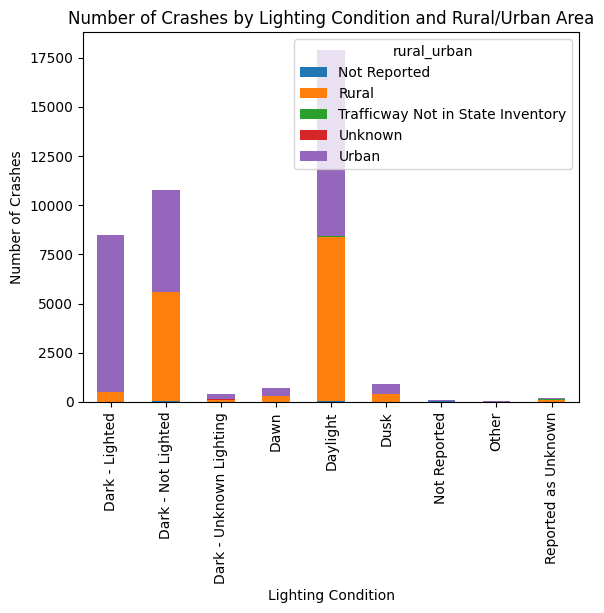

In [143]:
# why this visualization?
# To understand the number of crashes based on lighting conditions and rural/urban areas
crash.groupby(['lighting_condition', 'rural_urban'])['lighting_condition'].count().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Lighting Condition')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Lighting Condition and Rural/Urban Area')
plt.show()


Key Insights:
The number of crashes based on clear lighting conditions and rural/urban in both areas are almost same. Followed Dark Lighted Condition where there are more crashes in urban areas and Dark Not Lighted condition where there are almost similar number of crashes in both areas.